# Customer Satisfaction Analysis
## Objective:
The goal of this task is to analyze customer satisfaction by integrating both **user engagement** and **user experience** metrics to compute a satisfaction score for each user. This will help in understanding how engagement levels and network performance impact overall customer satisfaction, allowing for targeted improvements.

### Importing aggregated data and centroids from User Engagement analysis and  User Experience analysis

In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sys.path.append(os.path.abspath('../scripts'))
from export_data import export_data_to_mysql
sys.path.append(os.path.abspath('../src'))
from satisfaction_utils import get_user_data, calculate_engagement_score, calculate_experience_score, calculate_satisfaction_score

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
import json

# Load engagement centroid
with open('../assets/engagement_cluster_centers.json', 'r') as f:
    engagement_centroid = json.load(f)

# Load experience centroid
with open('../assets/experience_cluster_centers.json', 'r') as f:
    experience_centroid = json.load(f)


In [3]:
# Load centroids
engagement_df = pd.read_csv('../assets/engagement_aggregated_data.csv')
experience_df = pd.read_csv('../assets/experience_metrics.csv')

In [4]:
# Display the first few rows of the dataframe
engagement_df.head()

,MSISDN/Number,session_count,total_duration_ms,total_download,total_upload,Social Media_total_data,Google_total_data,Email_total_data,Youtube_total_data,Netflix_total_data,Gaming_total_data,Other_total_data,engagement_cluster
0,3.360100e+10,-0.500956,-0.169065,0.475444,-0.610760,386570872.0,386570872.0,386570872.0,386570872.0,386570872.0,386570872.0,386570872.0,0
1,3.360100e+10,-0.500956,0.375105,-1.130503,-0.609254,281710071.0,281710071.0,281710071.0,281710071.0,281710071.0,281710071.0,281710071.0,0
2,3.360100e+10,-0.500956,-0.015127,-0.160761,-0.515348,501693672.0,501693672.0,501693672.0,501693672.0,501693672.0,501693672.0,501693672.0,0
3,3.360101e+10,-0.500956,-0.732906,-0.504842,-1.071898,35279702.0,35279702.0,35279702.0,35279702.0,35279702.0,35279702.0,35279702.0,0
4,3.360101e+10,0.805456,-0.840660,1.633367,1.096706,804804484.0,804804484.0,804804484.0,804804484.0,804804484.0,804804484.0,804804484.0,2


In [5]:
engagement_df.shape

(106019, 13)

In [6]:
experience_df.head()

,MSISDN/Number,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),experience_cluster
0,3.360100e+10,-0.325246,-0.731665,-0.566859,-0.438150,0.000123,-0.026127,4
1,3.360100e+10,-0.447048,-0.673094,-0.566166,-0.431923,0.000123,-0.026127,4
2,3.360100e+10,0.160407,0.302861,-0.566166,-0.432961,0.000123,-0.026127,4
3,3.360101e+10,-0.150156,0.146894,-0.556339,-0.435556,-0.948832,-0.026127,4
4,3.360101e+10,-0.462274,-0.731665,-0.567741,-0.437632,0.000123,-0.026127,4


In [7]:
experience_df.shape

(102768, 8)

In [8]:
# Merge the two dataframes based on the 'MSISDN/Number' column
df = pd.merge(engagement_df[['MSISDN/Number', 'session_count', 'total_duration_ms', 'total_download', 'total_upload', 'engagement_cluster']], 
              experience_df[['MSISDN/Number', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
                            'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'experience_cluster']], 
                            on='MSISDN/Number')


In [9]:
df.head()

,MSISDN/Number,session_count,total_duration_ms,total_download,total_upload,engagement_cluster,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),experience_cluster
0,3.360100e+10,-0.500956,-0.169065,0.475444,-0.610760,0,-0.325246,-0.731665,-0.566859,-0.438150,0.000123,-0.026127,4
1,3.360100e+10,-0.500956,0.375105,-1.130503,-0.609254,0,-0.447048,-0.673094,-0.566166,-0.431923,0.000123,-0.026127,4
2,3.360100e+10,-0.500956,-0.015127,-0.160761,-0.515348,0,0.160407,0.302861,-0.566166,-0.432961,0.000123,-0.026127,4
3,3.360101e+10,-0.500956,-0.732906,-0.504842,-1.071898,0,-0.150156,0.146894,-0.556339,-0.435556,-0.948832,-0.026127,4
4,3.360101e+10,0.805456,-0.840660,1.633367,1.096706,2,-0.462274,-0.731665,-0.567741,-0.437632,0.000123,-0.026127,4


To calculate satisfaction for all users in the DataFrame, I can loop over all rows and compute the scores.

In [10]:
print(engagement_centroid)

{'cluster_0': [-0.48893038365948716, -0.3123040572425493, -0.3862672231184948, -0.4567525090975768], 'cluster_1': [3.390586349648205, 2.827458171115668, 2.7894236136570765, 3.191399879611737], 'cluster_2': [0.9600119801952032, 0.48245779526420757, 0.736545359237627, 0.8920971626130203]}


In [11]:
print(experience_centroid)

{'cluster_0': [-0.08811929837521137, 0.22012539571137388, 1.5346775349708761, 0.5399669682581976, -0.5677644427829149, -0.48155760672384795], 'cluster_1': [-0.15710969576476586, -0.10311580485423172, -0.2758842343217577, -0.19539578448721284, 1.5220750635836757, 1.2351220800007032], 'cluster_2': [6.02944818899719, 0.0029378487163084703, -0.15368591241699006, -0.08889547741956515, -0.605295013694621, -0.558592827401667], 'cluster_3': [-0.03465537276007376, 0.5931555510988722, 1.8664731550095073, 3.8940698085339207, -0.22878580761920755, -0.39553733322537843], 'cluster_4': [-0.11369094173124289, -0.2186942856501589, -0.4580964518825118, -0.3525604940937958, -0.12046521271936263, -0.07914712962762584], 'cluster_5': [0.11879897647264073, 5.3104049346543265, 0.7758353484091636, 0.45497476791871727, -0.40241200435262314, -0.2631233224612972]}


**Based on the engagement analysis + the experience analysis I conducted above I will calculate the satisfaction score.**

**Engagement score** to each user. Consider the engagement score as the Euclidean distance between the user data point & the less engaged cluster (use the first clustering for this).

**Experience score** for each user. Consider the experience score as the Euclidean distance between the user data point & the worst experience cluster.


In [12]:
# Initialize lists to store results
satisfaction_scores = []
engagement_scores = []
experience_scores = []
# Loop over all users in the DataFrame
for index in range(len(df)):
    user_data = get_user_data(df, index)
    
    # Calculate engagement and experience scores
    engagement_score = calculate_engagement_score(user_data[:4], engagement_centroid['cluster_0'])
    engagement_scores.append(engagement_score)
    experience_score = calculate_experience_score(user_data[4:], experience_centroid['cluster_0'])
    experience_scores.append(experience_score)

    # Calculate the satisfaction score
    satisfaction_score = calculate_satisfaction_score(engagement_score, experience_score)
    satisfaction_scores.append(satisfaction_score)

# Add the scores to the DataFrame
df['engagement_score'] = engagement_scores
df['experience_score'] = experience_scores
df['satisfaction_score'] = satisfaction_scores

In [13]:
# Exporting the clustered data to a CSV file
df.to_csv("../assets/satisfaction_aggregated_data.csv", index=False)

### Find Top 10 Satisfied Customers

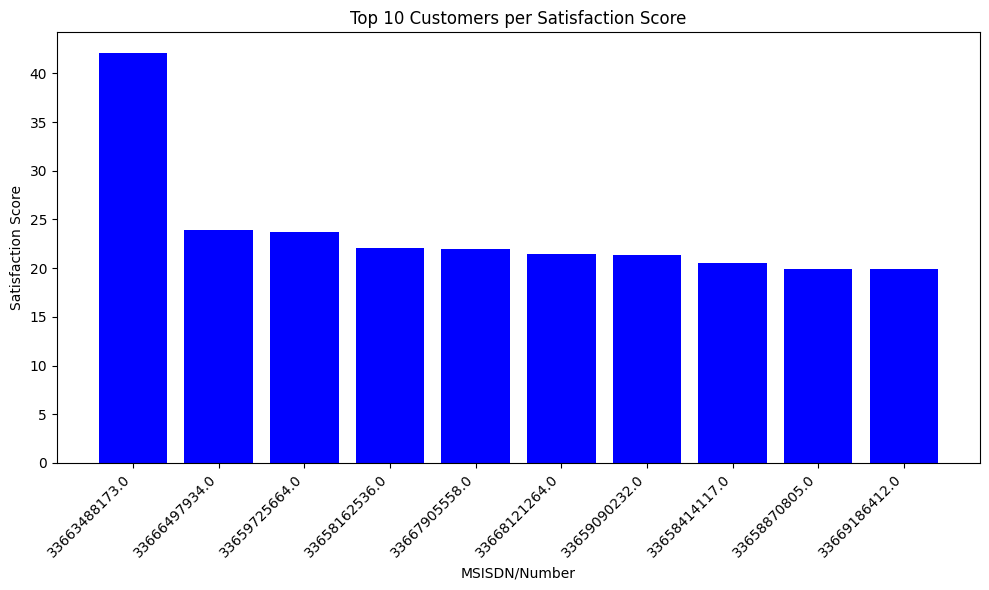

In [14]:
top_10_satisfied = df.sort_values(by='satisfaction_score', ascending=False).head(10)

# Create a bar plot for the top 10 customers
plt.figure(figsize=(10, 6))
plt.bar(top_10_satisfied['MSISDN/Number'].astype(str), top_10_satisfied['satisfaction_score'], color='blue')

# Add title and labels
plt.title("Top 10 Customers per Satisfaction Score")
plt.xlabel("MSISDN/Number")
plt.ylabel("Satisfaction Score")

# Rotate x-axis labels for better readability
plt.xticks(ha='right', rotation=45)

# Show plot
plt.tight_layout()
plt.show()

## Build a Regression Model to Predict Satisfaction Score

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

X = df[['engagement_score', 'experience_score']]
y = df['satisfaction_score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply lin regression
ridge_model = Ridge(alpha=1)  # The alpha parameter controls the strength of regularization
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)
# Use regression metrics
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Model Score: {r2_score(y_test, y_pred)}")
accuracy = ridge_model.score(X_test, y_test)
print("Accuracy percentage: ", accuracy * 100, "%")

Mean Squared Error: 2.6123795925476426e-11
Model Score: 0.9999999999808755
Accuracy percentage:  99.99999999808755 %


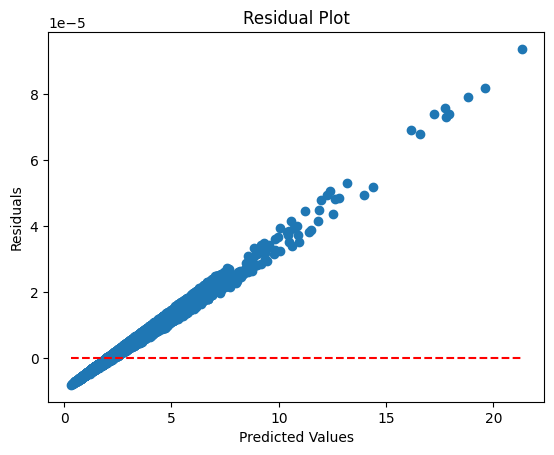

In [16]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='red', linestyles='dashed')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

This residual plot shows the difference between predicted values and actual values (residuals) in a model. The y-axis represents the residuals, while the x-axis shows the predicted values. Ideally, residuals should be randomly distributed around the horizontal red line at 0.

Key observations:

* The residuals are not randomly dispersed; instead, they increase as the predicted values rise, forming a distinct pattern.
* This pattern suggests that the model is not fitting the data well, possibly indicating non-linearity or heteroscedasticity (increasing variance).
* The upward trend in residuals indicates that the model systematically underestimates higher predicted values.

This suggests a potential need for model improvement, such as transforming variables.


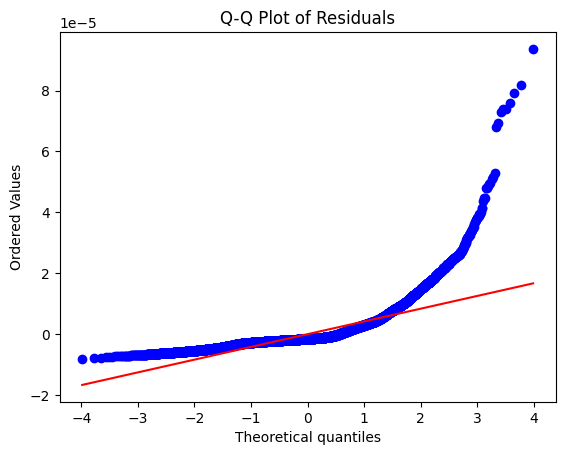

In [17]:
import scipy.stats as stats

# Q-Q plot to check the normality of residuals
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

The Q-Q plot of residuals compares the distribution of your residuals to a normal distribution. In an ideal scenario (perfect normality), the residuals would lie on the red diagonal line.

The plot suggests that while the model performs relatively well for most observations, the presence of extreme residuals indicates potential outliers or non-normality, which could affect model assumptions.

In [18]:
# Saving the model
import pickle
pickle.dump(ridge_model, open('model.pkl', 'wb'))

### Run K-means (k=2) on Engagement & Experience Scores

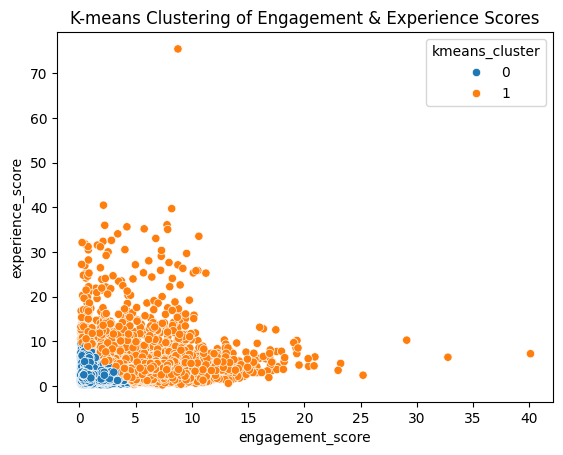

In [19]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(df[['engagement_score', 'experience_score']])

sns.scatterplot(x='engagement_score', y='experience_score', hue='kmeans_cluster', data=df)
plt.title('K-means Clustering of Engagement & Experience Scores')
plt.show()


This K-means clustering analysis above shows two distinct groups based on engagement and experience scores.

**Cluster 0 (blue)** consists of users with low engagement (avg: 1.12) and low experience scores (avg: 1.75), indicating a group with minimal interaction and likely dissatisfaction (avg satisfaction score: 1.43).

On the other hand, **Cluster 1 (orange)** includes users with significantly higher engagement (avg: 4.56) and experience scores (avg: 4.80), suggesting a more satisfied and active group (avg satisfaction score: 4.68).

The plot visually highlights the spread, with Cluster 1 showing more variability in engagement, while Cluster 0 is more concentrated at lower scores. This segmentation can guide targeted strategies to improve the experience of Cluster 0 users while maintaining engagement for Cluster 1.

### Aggregate the Average Satisfaction and Experience Score Per Cluster

In [20]:
cluster_aggregates = df.groupby('kmeans_cluster').agg({
    'engagement_score': 'mean',
    'experience_score': 'mean',
    'satisfaction_score': 'mean'
})
print(cluster_aggregates)

                engagement_score  experience_score  satisfaction_score
kmeans_cluster                                                        
0                       1.111313          2.493043            1.802178
1                       5.313295          4.496697            4.904996


In [21]:
df.head()

,MSISDN/Number,session_count,total_duration_ms,total_download,total_upload,engagement_cluster,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),experience_cluster,engagement_score,experience_score,satisfaction_score,kmeans_cluster
0,3.360100e+10,-0.500956,-0.169065,0.475444,-0.610760,0,-0.325246,-0.731665,-0.566859,-0.438150,0.000123,-0.026127,4,0.887089,2.620156,1.753622,0
1,3.360100e+10,-0.500956,0.375105,-1.130503,-0.609254,0,-0.447048,-0.673094,-0.566166,-0.431923,0.000123,-0.026127,4,1.024607,2.610498,1.817552,0
2,3.360100e+10,-0.500956,-0.015127,-0.160761,-0.515348,0,0.160407,0.302861,-0.566166,-0.432961,0.000123,-0.026127,4,0.377817,2.441036,1.409426,0
3,3.360101e+10,-0.500956,-0.732906,-0.504842,-1.071898,0,-0.150156,0.146894,-0.556339,-0.435556,-0.948832,-0.026127,4,0.754662,2.384499,1.569580,0
4,3.360101e+10,0.805456,-0.840660,1.633367,1.096706,2,-0.462274,-0.731665,-0.567741,-0.437632,0.000123,-0.026127,4,2.906330,2.636602,2.771466,0


In [22]:
telecom_usr_analysis = df[['MSISDN/Number', 'engagement_score', 'experience_score', 'satisfaction_score']]

In [23]:
export_data_to_mysql(telecom_usr_analysis)

Data exported successfully to MySQL!
